# Predictive Analysis Basics

###### Problem Statement:
You are the data scientist of a telecom company "Amdocs" and it's customers are churning out to its competitors. You have to analyze the data and find insights and stop your customers to churn out to your competitors.

###### Tasks to be done:
1. Data Manipulation
2. Data Visualization

###### ML models:
3. Linear regression
4. Logistic Regression
5. Decision Tree
6. Random Forest

### 1. Data Manipulation

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Loading customer churn data set into cust_churn dataframe:
cust_churn = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# Top 5 records:
cust_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We need 5th column (or Dependents column) for our analysis. So we are creating a seperate dataframe for this column as c_5

In [4]:
# Using column indexing: c_5 = cust_churn.loc['Dependents']
# Below is the integer indexing example we are using (syntax-> df.iloc[rows,columns])
c_5 = cust_churn.iloc[:,4]

In [5]:
c_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [6]:
# Similary we are extracting 15th column:
c_15 = cust_churn.iloc[:,14]
c_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

###### Now we need to extract all male senior citizens whose payment method is Electronic cheque.

In [7]:
senior_male_electronic = cust_churn[(cust_churn['gender'] == 'Male') & (cust_churn['SeniorCitizen'] == 1) & (cust_churn['PaymentMethod'] == 'Electronic check')]

In [8]:
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


##### Now we need to extract all those customers whose tenure is greater than 70 months or their monthly charges is more than 100 dollers

In [9]:
customer_total_tenure = cust_churn[(cust_churn['tenure']>70) | (cust_churn['MonthlyCharges']> 100)]

In [10]:
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


##### Now we need to extract all those customers whose contract is of two years, payment method is mailed check and value of churn is 'Yes'

In [11]:
two_mail_yes = cust_churn[(cust_churn['Contract']=='Two year')&(cust_churn['PaymentMethod']=='Mailed check')&(cust_churn['Churn']=='Yes')]

In [12]:
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


##### Random Sampling:
Extract total 333 random records from entire dataframe. For this we will be using sample function.

Every time new sample is provided.

In [13]:
custumer_333 = cust_churn.sample(n=333)
custumer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6714,7315-WYOAW,Male,0,No,No,13,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,100.75,1313.25,No
5395,9095-HFAFX,Female,0,No,No,5,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),81.00,389.6,Yes
2744,0815-MFZGM,Female,0,Yes,No,42,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),99.00,4135,No
1957,5619-PTMIK,Female,0,Yes,No,46,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,53.10,2459.8,No
6395,3058-HJCUY,Male,0,Yes,Yes,41,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,102.60,4213.35,Yes


##### Get the count of different levels from churn column.

In [14]:
cust_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [15]:
# similarly we can calculate for Contract column:
cust_churn['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

### 2. Data Visualization:
a. Build a bar-plot for 'InternetService' column,

b. Build a histogram for the 'tenure' column,

c. Build a scatter-plot between 'MonthlyCharges'(y-axis) and 'tenure'(x-axis),

d. Build a box-plot between 'tenure'(y-axis) and 'contract'(x-axis).

###### a. Build a bar-plot for 'InternetService' column
We use bar-plots when we want visualize categorical column values.

Text(0.5, 1.0, 'Distribution of Internet Service')

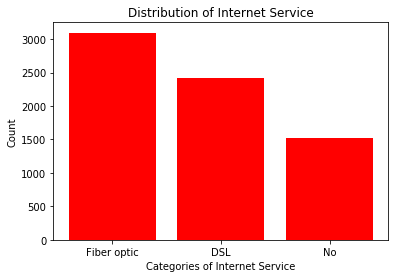

In [16]:
# plt.bar(arg1, arg2, color = 'red')
# arg1 is distinct values of InternetService columns: cust_churn['InternetService'].value_counts().keys().to_list()
# arg2 is the count of Internetservice columns

plt.bar(cust_churn['InternetService'].value_counts().keys().tolist(),cust_churn['InternetService'].value_counts().tolist(), color = 'red')

# Now we need label and title:
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count')
plt.title('Distribution of Internet Service')

##### b. Build a histogram for the 'tenure' column
We use histogram when we want visualize numerical column values.

Text(0.5, 1.0, 'Distribution of tenure')

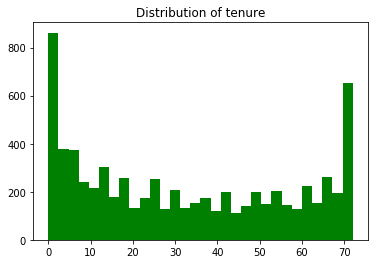

In [17]:
# plt.hist(arg1, bins, color)
plt.hist(cust_churn['tenure'], bins = 30 ,color = 'green')

plt.title('Distribution of tenure')

##### c. Build a scatter-plot between 'MonthlyCharges'(y-axis) and 'tenure'(x-axis)

Text(0.5, 1.0, 'MonthlyCharges vs tenure')

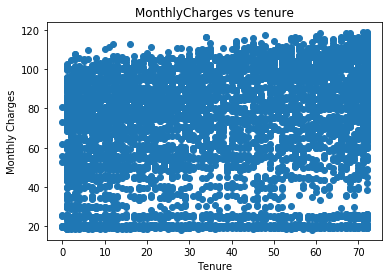

In [18]:
# plt.scatter(x, y)

plt.scatter(cust_churn['tenure'], cust_churn['MonthlyCharges'])

plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('MonthlyCharges vs tenure')

##### d. Build a box-plot between 'tenure'(y-axis) and 'contract'(x-axis)

Text(0.5, 1.0, 'Contract vs Tenure')

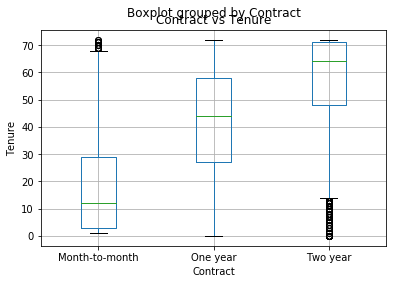

In [19]:
# DF.boxplot(column='y-axis', by='x-axis')

cust_churn.boxplot(column=['tenure'], by=['Contract'])

plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Contract vs Tenure')

### 3. Linear regression (Machine Learning)
Build a simple linear model where dependent variable is 'MonthlyCharges'(y) and independent variable is 'tenure'(x).

Note: Dependent variable is always numerical value column.

y = mx + c

In [20]:
# importing ML libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##### Seperating Dependent and Independent variables

In [21]:
y = cust_churn[['MonthlyCharges']]
x = cust_churn[['tenure']]

In [22]:
#y.head(),x.head()

##### Dividing dataset into training and test datasets

In [23]:
# Dividing the dataset into training dataset and testing dataset
# train_test_split gives us four results so we store them in differnet datasets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state=0)

In [24]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4930, 1), (4930, 1), (2113, 1), (2113, 1))

##### Building a ML model:
A ML model is always build on training data.

In [25]:
# Creating instatnce/object of LinearRegression Class:
regressor = LinearRegression()

# Fitting the train data sets
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Now predict the values based on test data set
y_predict = regressor.predict(x_test)

Now we need to check how well prediction has been done. In Linear regression one way to check this is using Root Mean Square(RMS) values. Here we compare test and predict values and calculate RMS values.

Lower the value of RMS, better is the ML model.

In [27]:
# for RMS we will use numpy function (np.sqrt) and we will use our test data set
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,y_predict))

29.394584027273893

Now we can check our predicted values(Dependent variable values) in y_predict dataframe.

In [28]:
print(y_predict[:5]) # Predicted Values
print(y_test[:5]) # Actual Values

[[60.95089608]
 [72.98096699]
 [59.1903979 ]
 [55.66940154]
 [71.51388517]]
      MonthlyCharges
2200           58.20
4627          116.60
3225           71.95
2828           20.45
3768           77.75


### 4. Logistic Regression

a. Build a Simple Logistic Regression model where dependent variable is 'churn' and independent variable is 'MonthlyCharges'

b. Build a Multiple Logistic Regression model where dependent variable is 'churn' and independent variables are 'MonthlyCharges' and 'tenure'

##### Simple Logistic Regression model

In [29]:
# importing libraries
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [30]:
# seperating dependent and independent variables
x = cust_churn[['MonthlyCharges']]
y = cust_churn[['Churn']]

In [31]:
# Dividing dataset into training and test data set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=0)

# Let's check size of our train and test data sets
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4577, 1), (4577, 1), (2466, 1), (2466, 1))

In [32]:
# creating instantce/object of Logistic regression class
regressor = LogisticRegression()

# Fitting the model on our training data sets:
regressor.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
# Predicting values
y_predict = regressor.predict(x_test)

# Checking first 5 values
y_predict[:5]

array(['No', 'No', 'No', 'No', 'No'], dtype=object)

Now we want to check how well prediction has been done. One more way to check this is using Confusion Matrix and accuracy score.

Behind the pictures, Confusion matrix is used to calculate Accuracy score.

In [34]:
# importing libraries
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
# Confusion matrix:
confusion_matrix(y_test, y_predict)

array([[1815,    0],
       [ 651,    0]])

In [36]:
# Accuracy Score:
accuracy_score(y_test, y_predict)

# (1815+0)/(1815+0+651+0)

0.7360097323600974

##### Multiple Logistic Regression model

In [37]:
# Importing libraries
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [38]:
# Seperating dependent and Independent Variables
x = cust_churn[['MonthlyCharges','tenure']]
y = cust_churn[['Churn']]

In [39]:
# Dividing data set into training and test data sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

# Checking shape of train and test data sets
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((5634, 2), (5634, 1), (1409, 2), (1409, 1))

In [40]:
# Creating instance/object of Logistic Regression class
regressor = LogisticRegression()

# Fitting data sets to our model
regressor.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
# Predicting values
y_predict = regressor.predict(x_test)

# Checking first 5 values
y_predict[:5]

array(['No', 'No', 'No', 'No', 'No'], dtype=object)

Checking Confusion Matrix and Accuracy score using our test data set.

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [43]:
# Confusion Matrix
confusion_matrix(y_test,y_predict)

array([[935, 106],
       [211, 157]])

In [44]:
# Accuracy score
accuracy_score(y_test, y_predict)

# (935+157)/(935+157+211+106)

0.7750177430801988

### 5. Decision Tree

Build a Decision Tree model whose dependent variable is 'churn' and independent variable is 'tenure'

In [45]:
# Importing Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [46]:
# Seperating dependent and independent variables
x = cust_churn[['tenure']]
y = cust_churn[['Churn']]

In [47]:
# Dividing data set into training and test data sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

# Checking shape of train and test data sets
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((5634, 1), (5634, 1), (1409, 1), (1409, 1))

In [48]:
# Creating instance/object of Logistic Regression class
DTree = DecisionTreeClassifier()

# Fitting data sets to our model
DTree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
# Predicting Values
y_predict = DTree.predict(x_test)

# Checking first 5 Values
y_predict[:5]

array(['No', 'No', 'No', 'Yes', 'No'], dtype=object)

In [50]:
# Now we will check confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

In [51]:
# Confusion matrix:
confusion_matrix(y_test,y_predict)

array([[965,  76],
       [281,  87]])

In [52]:
# Accuracy Score
accuracy_score(y_test,y_predict)

0.7466288147622427

### 6. Random Forest
Build a Random Forest model whose dependent variable is 'Churn' and independent variables are 'tenure' and 'MonthlyCharges'

In [53]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
# Creating instance/object
rf = RandomForestClassifier()

# Fitting model
rf.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
# Predicting values
y_predict = rf.predict(x_test)

# Checking first 5 values
y_predict[:5]

array(['No', 'No', 'No', 'Yes', 'No'], dtype=object)

In [56]:
# confusion matrix
confusion_matrix(y_test,y_predict)

array([[947,  94],
       [266, 102]])

In [57]:
# Accuracy Score
accuracy_score(y_test,y_predict)

0.7444996451383961